In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

### Getting real-time cryptocurrency data (bitcoin)

In [ ]:
data = pd.read_csv('/content/BTC-USD.csv', date_parser = True)
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1822,2021-09-20,47261.406250,47328.199219,42598.914063,42843.800781,42843.800781,4.390985e+10
1823,2021-09-21,43012.234375,43607.609375,39787.609375,40693.675781,40693.675781,4.870109e+10
1824,2021-09-22,40677.953125,43978.621094,40625.632813,43574.507813,43574.507813,3.813971e+10
1825,2021-09-23,43560.296875,44942.175781,43109.339844,44895.097656,44895.097656,3.424406e+10
1826,2021-09-24,44858.941406,44951.949219,43996.035156,44225.003906,44225.003906,3.329657e+10


In [ ]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1823.000000,1823.000000,1823.000000,1823.000000,1823.000000,1.823000e+03
mean,12562.440455,12919.055186,12171.932037,12585.280719,12585.280719,1.899253e+10
std,14328.866958,14761.705859,13824.860353,14344.321311,14344.321311,2.122287e+10
min,600.807007,603.380981,599.710999,600.825989,600.825989,3.397780e+07
25%,4079.807740,4165.619629,3995.687622,4082.832642,4082.832642,3.717140e+09
50%,7991.885254,8197.788086,7788.373535,7988.560547,7988.560547,1.316083e+10
75%,11251.101562,11528.194824,10928.497558,11277.880860,11277.880860,2.881743e+10
max,63523.753906,64863.097656,62208.964844,63503.457031,63503.457031,3.509679e+11


In [ ]:
data_training = data[data['Date']< '2020-01-01'].copy()
data_training

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-09-24,602.960999,604.580017,602.044983,602.625000,602.625000,3.535950e+07
1,2016-09-25,602.749023,603.380981,599.710999,600.825989,600.825989,3.397780e+07
2,2016-09-26,600.807007,608.143005,600.348999,608.043030,608.043030,5.915380e+07
3,2016-09-27,608.021973,608.247986,604.109985,606.166016,606.166016,4.942240e+07
4,2016-09-28,606.242981,606.590027,604.606995,604.728027,604.728027,4.872260e+07
...,...,...,...,...,...,...,...
1189,2019-12-27,7238.141113,7363.529297,7189.934082,7290.088379,7290.088379,2.277736e+10
1190,2019-12-28,7289.031250,7399.041016,7286.905273,7317.990234,7317.990234,2.136567e+10
1191,2019-12-29,7317.647461,7513.948242,7279.865234,7422.652832,7422.652832,2.244526e+10
1192,2019-12-30,7420.272949,7454.824219,7276.308105,7292.995117,7292.995117,2.287413e+10


In [ ]:
data_test = data[data['Date']< '2020-01-01'].copy()
data_test

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-09-24,602.960999,604.580017,602.044983,602.625000,602.625000,3.535950e+07
1,2016-09-25,602.749023,603.380981,599.710999,600.825989,600.825989,3.397780e+07
2,2016-09-26,600.807007,608.143005,600.348999,608.043030,608.043030,5.915380e+07
3,2016-09-27,608.021973,608.247986,604.109985,606.166016,606.166016,4.942240e+07
4,2016-09-28,606.242981,606.590027,604.606995,604.728027,604.728027,4.872260e+07
...,...,...,...,...,...,...,...
1189,2019-12-27,7238.141113,7363.529297,7189.934082,7290.088379,7290.088379,2.277736e+10
1190,2019-12-28,7289.031250,7399.041016,7286.905273,7317.990234,7317.990234,2.136567e+10
1191,2019-12-29,7317.647461,7513.948242,7279.865234,7422.652832,7422.652832,2.244526e+10
1192,2019-12-30,7420.272949,7454.824219,7276.308105,7292.995117,7292.995117,2.287413e+10


In [ ]:
 training_data = data_training.drop(['Date', 'Adj Close'], axis = 1)
 training_data.head()

,Open,High,Low,Close,Volume
0,602.960999,604.580017,602.044983,602.625000,35359500.0
1,602.749023,603.380981,599.710999,600.825989,33977800.0
2,600.807007,608.143005,600.348999,608.043030,59153800.0
3,608.021973,608.247986,604.109985,606.166016,49422400.0
4,606.242981,606.590027,604.606995,604.728027,48722600.0


### Normalization
The first step we will take to our data is to normalize its values. The goal of normalization is to change the values of numeric columns in the data set to a common scale, without distorting differences in the ranges of values.

In [ ]:
#MinMaxScaler is used to normalize the data
scaler = MinMaxScaler()
training_data = scaler.fit_transform(training_data)
training_data

array([[1.14118819e-04, 6.15344064e-05, 1.27023764e-04, 9.52030226e-05,
        3.06555622e-05],
       [1.02888299e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [0.00000000e+00, 2.44386591e-04, 3.47222437e-05, 3.81923244e-04,
        5.58575982e-04],
       ...,
       [3.55859214e-01, 3.54649614e-01, 3.63557905e-01, 3.61008652e-01,
        4.97235568e-01],
       [3.61296328e-01, 3.51615375e-01, 3.63364314e-01, 3.54147211e-01,
        5.06750928e-01],
       [3.54629625e-01, 3.45480893e-01, 3.57566555e-01, 3.48887211e-01,
        4.68896056e-01]])

In [ ]:
X_train = [] 
Y_train = []

In [ ]:
training_data.shape[0]

1194

In [ ]:
for i in range(60, training_data.shape[0]):
   X_train.append(training_data[i-60:i])
   Y_train.append(training_data[i,0])

In [ ]:
X_train, Y_train = np.array(X_train), np.array(Y_train)
X_train.shape


(1134, 60, 5)

### Predict the price of cryptocurrency using LSTM neural network (deep learning)

In [ ]:
from tensorflow.keras import Sequential

In [ ]:
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [ ]:
model = Sequential() 
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 5)))


In [ ]:
model.add(Dropout(0.2)) 
model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))
model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))
model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5)) 
model.add(Dense(units =1))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            11200     
_________________________________________________________________
dropout (Dropout)            (None, 60, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 60)            26640     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 60)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 80)            45120     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 80)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 120)               9

In [ ]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
history= model.fit(X_train, Y_train, epochs = 20, batch_size =50, validation_split=0.1)

Epoch 1/20
21/21 [==============================] - 9s 227ms/step - loss: 0.0478 - val_loss: 0.0058
Epoch 2/20
21/21 [==============================] - 4s 196ms/step - loss: 0.0130 - val_loss: 0.0016
Epoch 3/20
21/21 [==============================] - 4s 190ms/step - loss: 0.0092 - val_loss: 0.0015
Epoch 4/20
21/21 [==============================] - 4s 191ms/step - loss: 0.0077 - val_loss: 0.0014
Epoch 5/20
21/21 [==============================] - 4s 196ms/step - loss: 0.0071 - val_loss: 0.0031
Epoch 6/20
21/21 [==============================] - 4s 198ms/step - loss: 0.0065 - val_loss: 0.0017
Epoch 7/20
21/21 [==============================] - 4s 193ms/step - loss: 0.0069 - val_loss: 0.0012
Epoch 8/20
21/21 [==============================] - 4s 192ms/step - loss: 0.0063 - val_loss: 0.0061
Epoch 9/20
21/21 [==============================] - 4s 196ms/step - loss: 0.0088 - val_loss: 0.0023
Epoch 10/20
21/21 [==============================] - 4s 193ms/step - loss: 0.0055 - val_loss: 0.0010

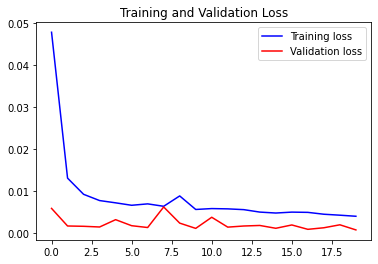

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [ ]:
part_60_days = data_training.tail(60)
df= part_60_days.append(data_test, ignore_index = True)
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,9259.783203,9377.486328,9249.587891,9324.717773,2.124268e+10
1,9324.787109,9379.806641,9141.251953,9235.354492,2.113222e+10
2,9235.607422,9505.051758,9191.485352,9412.612305,2.617026e+10
3,9413.004883,9457.417969,9256.931641,9342.527344,2.619861e+10
4,9340.864258,9423.237305,9305.909180,9360.879883,2.313390e+10


In [ ]:
inputs = scaler.transform(df) 
inputs

array([[0.45875386, 0.4502862 , 0.47075726, 0.46166525, 0.47055408],
       [0.46219777, 0.45040528, 0.46486123, 0.45693618, 0.46810342],
       [0.45747302, 0.45683285, 0.46759511, 0.4663166 , 0.57988152],
       ...,
       [0.35585921, 0.35464961, 0.36355791, 0.36100865, 0.49723557],
       [0.36129633, 0.35161537, 0.36336431, 0.35414721, 0.50675093],
       [0.35462962, 0.34548089, 0.35756655, 0.34888721, 0.46889606]])

In [ ]:
from sklearn.linear_model import LinearRegression

In [34]:
X_test = []
Y_test = []
for i in range (60, inputs.shape[0]):
    X_test.append(inputs[i-60:i])
    Y_test.append(inputs[i, 0])
X_test, Y_test = np.array(X_test), np.array(Y_test)
X_test.shape, Y_test.shape
nsamples, nx, ny = X_test.shape
X_test2 = np.array(X_test.reshape((nsamples,nx*ny)))
regressor=LinearRegression(fit_intercept=True)
regressor.fit(X_test2, Y_test)
Y_pred = regressor.predict(X_test2)
Y_pred, Y_test
scaler.scale_

array([5.29801499e-05, 5.13198990e-05, 5.44235795e-05, 5.29196445e-05,
       2.21868439e-11])

In [35]:
scale = 1/5.29801499e-05
Y_test = Y_test*scale 
Y_pred = Y_pred*scale
Y_pred

array([ 3.43919153e+03, -8.78611482e+00, -3.63273025e+00, ...,
        6.18731109e+03,  6.88141555e+03,  6.91563622e+03])

In [36]:
Y_test

array([2.15399200e+00, 1.94201600e+00, 0.00000000e+00, ...,
       6.71684046e+03, 6.81946595e+03, 6.69363196e+03])

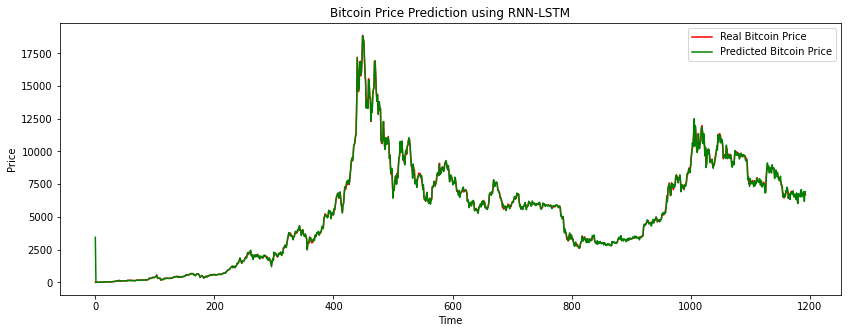

In [44]:
plt.figure(figsize=(14,5))
plt.plot(Y_test, color = 'red', label = 'Real Bitcoin Price')
plt.plot(Y_pred, color = 'green', label = 'Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction using RNN-LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

###Conclusion

RNNs and LSTM are excellent technologies and have great architectures that can be used to analyze and predict time-series information. 